# Quest for lattice symmetries.

This notebook allows us to study the rotation symmetries of the 2x2x2 Gauss lattice. The logic for the transformations is coded in `lattice_object.py`, which contains a class `LatticeObject` that represents a given lattice configuration.

In [249]:
import numpy as np
from matplotlib import cm 
import matplotlib.pyplot as plt
%matplotlib inline

from lattice_object import LatticeObject

#### Basis lattices.
These latttice configurations are the ones with the maximum number of flippable plaquettes, i.e., `16` for a `2 x 2 x 2` system, of which there are `12`.

In [22]:
lattices = np.array([ 
    3816540,  
    3872106,  
    5421780,
    5678001,  
    7542990,  
    7743645,  
    9033570,  
    9234225, 
    11099214, 
    11355435, 
    12905109,
    12960675
])

#### Example usage.
This is merely to illustrate the usage of the object. We take one of the basis states and rotate it along the axis $C_3^0$. The convention is that this refers to the $0$-th axis with a $3$-fold symmetry.

Setting up lattice 3816540
|001110100011110001011100> (3816540)
# of flippable plaquettes: 16
---
|010101101010001110110001> (5678001)
# of flippable plaquettes: 16


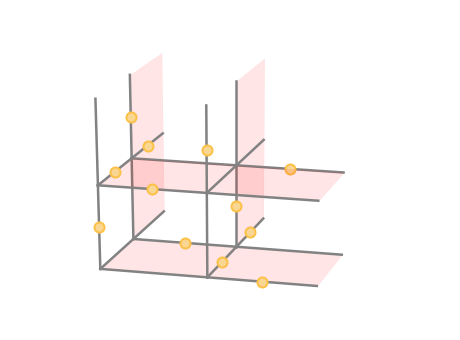

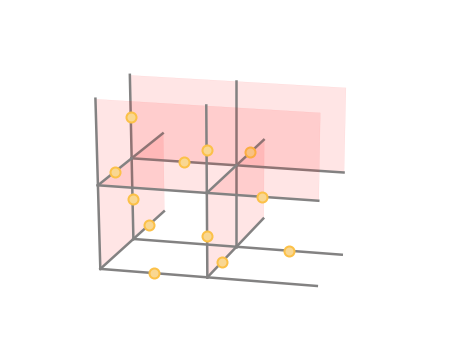

In [4]:
# Create lattice object with the first lattice of the above list. We could have used any other integer.
latt = LatticeObject(lattices[0], [2,2,2])

# Print some information.
print(latt.to_bin()) # Binary represenation.
latt.draw() # 3D drawing.
print('---')

# Perform rotation.
latt.apply_c3(axis=0, steps=2)

# Print informatioun again.
print(latt.to_bin())
latt.draw()

## Table of simple operations.
Here we produce a table of several simple operations to see how the states transform.

In [5]:
class LatticeBasis(object):
    """ Represents a collection of lattices.
    """
    def __init__(self, L=[2,2,2]):
        if L==[2,2,2]:
            self.lattices = np.array([
                3816540, 
                3872106,  
                5421780, 
                5678001, 
                7542990,  
                7743645,  
                9033570,  
                9234225, 
                11099214, 
                11355435, 
                12905109, 
                12960675 
            ])
        else:
            raise KeyError('Specified lattice not available.')
   

    def make_operator(self, op, quiet=False):
        """ Generates the operator as a list of indicies where 
            the i-th index maps to the entry at position i.
        """ 
        if not quiet:
            print(op)
        mlist = np.empty(shape=(len(self.lattices)), dtype=int)
        for init, state in enumerate(self.lattices):
            latt = LatticeObject(state, [2,2,2], quiet=True)
            if op.name == 'P':
                latt.apply_parity_flip()
            elif op.name == 'CC':
                latt.apply_charge_conjugation()
            elif op.name.startswith('C_2'):
                latt.apply_c2(op.args, steps=op.steps)
            elif op.name.startswith('C_3'):
                latt.apply_c3(op.args, steps=op.steps)
            elif op.name.startswith('C_4'):
                latt.apply_c4(op.args, steps=op.steps)
            elif op.name.startswith('T'):
                for step in op.args:
                    latt.apply_translation(axis=op.args, extent=1)
            else:
                raise KeyError('Unknown operator specified.')
                
            # Find which state we produced.
            try:
                final = np.where(self.lattices == latt.to_int())[0][0]
            except IndexError:
                final = np.nan
                
            # Map.
            mlist[init] = final
            
            # Print the result.
            if not quiet:
                print('{:2s} |{:2d}> = |{:2d}>'.format(op.name, init+1, final+1))
        return mlist
    
    
    def make_operator_batch(self, operations, latex_output=False, quiet=True, **kwargs):
        op_map = np.zeros(shape=(len(operations),len(self.lattices)), dtype=int) - 1
        for i, op in enumerate(operations):
            op_map[i,:] = self.make_operator(op, quiet=quiet)
            
        if latex_output:
            return self._to_table(op_map, list(map(lambda o: o.name, operations)), **kwargs)
        return op_map

        
    @staticmethod
    def _to_table(entries, ops, lpf=None):
        """ Takes a 2D array and produces the bulk of a table for latex.
        """
        ket = lambda s:  '\\ket{'+s+'}' if lpf is None else '\\ket{'+lpf+'_{'+s+'}}'
        conv = lambda x: '---' if x < 0 else '$'+ket(str(x))+'$' 
        rows, cols = np.shape(entries.T)

        # Header.
        print('\\begin{tabular}{c|' + 'c'*cols + '}')
        print('\\hline')
        op_line = '  $'+ket('n')+'$ &'
        for j in range(cols):
            op_line += '$' + ops[j] + '$  & '
        print(op_line[:-2] + ' \\\\')
        print('\\hline')

        # Bulk.
        for i in range(rows):
            print('  $'+ket(str(i+1))+'$ & ' + ' & '.join(map(conv, entries[:,i]+1)) + ' \\\\')

        # Fin.
        print('\\hline')
        print('\\end{tabular}')
        
class Operation(object):
    def __init__(self, name, args, steps=1):
        self.name = name
        self.args = args
        self.steps = steps
        
    def __repr__(self):
        return "Operation {0} [{1} // {2} steps].".format(self.name, self.args, self.steps)
        
operations = [
    Operation('T_{x}', [0]),
    Operation('T_{y}', [1]),
    Operation('T_{z}', [2]),
    Operation('T_{xy}', [0,1]),
    Operation('T_{xz}', [0,2]),
    Operation('T_{yz}', [1,2]),
    Operation('T_{xyz}', [0,1,2]),
    Operation('P', []),
    Operation('CC', [])
]

lb = LatticeBasis(L=[2,2,2])block_diag
lb.make_operator_batch(operations, quiet=True, latex_output=False, lpf=None)

array([[11, 10,  6,  8,  7,  9,  2,  4,  3,  5,  1,  0],
       [ 7, 10,  9,  8, 11,  6,  5,  0,  3,  2,  1,  4],
       [11,  3,  9,  1,  7,  6,  5,  4, 10,  2,  8,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 7,  3,  6,  1, 11,  9,  2,  0, 10,  5,  8,  4],
       [ 7,  3,  6,  1, 11,  9,  2,  0, 10,  5,  8,  4],
       [11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0]])

In [330]:
from scipy.linalg import block_diag
from copy import copy
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

class GSManifold(object):
    """ Holds the states for the GS manifold so that we can investigate them.
    """
    def __init__(self, state_file, L=[2,2,2]):
        # These are the 12 lowest eigenstates.
        self.eigenstates = np.load(state_file)
        self.lattice_base = LatticeBasis(L)
        
        # These are the energy manifolds.
        self.manifolds = {
            'E0' : [1],
            'E1' : [2,3],
            'E2' : [4,5,6],
            'E3' : [7,8,9],
            'E4' : [10,11],
            'E5' : [12]
        }
    def _make_operator(self, *args, **kwargs):
        return self.lattice_base.make_operator(*args, **kwargs)
    
    def _to_table(*args, **kwargs):
        return self.lattice_base._tot
    
    def _get_states(self, eigenstates):
        if eigenstates is None:
            return self.eigenstates
        else:
            return self.eigenstates[:,np.atleast_1d(eigenstates)-1]
    
    def apply_operator(self, op, eigenstates=None):
        """ Applies a signle operator to a list of eigenstates. If no 
            states arespecified, the operator will be applied to all states. 
        """
        states = self._get_states(eigenstates)
        operator = self._make_operator(op, quiet=True)
        new_states = np.array([s[operator] for s in states])
        return new_states
    
    def get_matrix(self, op, substates=None):
        """ Takes an operation and possibly a list of substates (by number 1-12). The matrix
            represenation in the specified subspace is returned.
        """
        # Shift to index.
        if substates:
            substates = np.array(substates)-1
        else:
            substates = np.array(list(range(self.eigenstates.shape[-1])))
        subspace = self.eigenstates[:,substates]
        
        # Make the operator.
        operator = self._make_operator(op, quiet=True)
        
        # Produce matrix.
        M = np.empty(shape=(len(substates),len(substates)), dtype=np.complex128)
        for i in range(len(substates)):
            for j in range(len(substates)):
                final = subspace[:,i][operator]        
                M[i,j] = np.dot(subspace[:,j], final)
        return M
    
    
    def diagonalize_operator(self, op):
        """ Returns a set of eigenvalues and eigenstates that diagonalize both the Hamiltonian 
            (which is in fact trivial, since we build those from energy eigenstates) and the 
            operator in question.
        """
#         O = np.zeros_like(self.eigenstates)
        O = []
        for _, man in self.manifolds.items():
            M = self.get_matrix(op, substates=man)
            ev, es = np.linalg.eig(M)
            B = np.dot(np.dot(np.conj(es.T), M), es)
            O.append(B)
        return self.get_matrix(op), block_diag(*O)

### Check several operators.

In [ ]:
def draw_matrices(m_list, axes=None, fig=None):
    ax = axes
    if axes is None:
        fig, ax = plt.subplots(1,len(m_list))
        fig.set_size_inches(4*len(m_list),4)
    else:
        ax = axes
    
    for i,M in enumerate(m_list):
        im = ax[i].imshow(M, cmap=cm.RdBu)
        im.set_clim(-1,1)
        cbar = fig.colorbar(im, ax=ax[i],fraction=0.046, pad=0.04)
        cbar.set_ticks([-1, -np.sqrt(3)/2, -0.5, 0, 0.5, np.sqrt(3)/2, 1])
        cbar.set_ticklabels(['$-1$', '$-\\sqrt{3}/2$', '$-1/2$', '$0$', '$1/2$', '$\\sqrt{3}/2$', '$1$'])
        
    # Draw the rectangles.
    rectangles = [
        [(-0.5,-0.5),1,1],
        [(0.5,0.5),2,2],
        [(2.5,2.5),3,3],
        [(5.5,5.5),3,3],
        [(8.5,8.5),2,2],
        [(10.5,10.5),1,1],
    ] 
    pc = PatchCollection(
        list([Rectangle(*r) for r in rectangles]), 
        facecolor='none',
        edgecolor='gray'
    )
    for a in ax.flatten():
        a.add_collection(copy(pc))
#     for a in ax.flatten():
#         a.add_collection(pc)

    if axes is None:
        return fig, ax
    

gsm = GSManifold('eigenstates_bosons_2x2x2_lam-100.00.npy')

operations = [
    Operation('C_2', 1, 1),
    Operation('C_2', 3, 1),
    Operation('C_2', 5, 1),
    Operation('C_3', 0, 1),
    Operation('C_3', 0, 2),
]

with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(len(operations), 3, squeeze=False)
    fig.set_size_inches(12, 3*len(operations))
    
    for i, op in enumerate(operations):
        M, O = gsm.diagonalize_operator(op)
        draw_matrices([M.real, O.real, O.imag], axes=ax[i,:], fig=fig)
        ax[i,0].set_ylabel(str(op))
        
    fig.tight_layout()
    fig.savefig('../../notes_overleaf/img/operator_diagonalization.pdf')

### Compare the matrices for different $\lambda$.

Operation C_2 [1 // 1 steps].


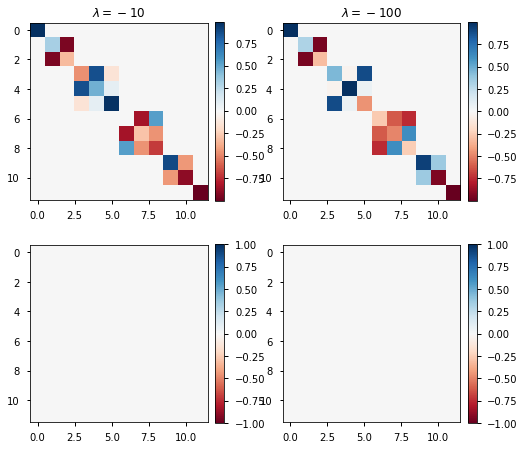

In [227]:
operation = Operation('C_2', 1, 1)
gsm10 = GSManifold('eigenstates_bosons_2x2x2_lam-10.00.npy')
gsm100 = GSManifold('eigenstates_bosons_2x2x2_lam-100.00.npy')
gsminf = GSManifold('eigenstates_bosons_2x2x2_lam-inf.npy')

M = {
    -10: gsm10.get_matrix(operation),
    -100: gsm100.get_matrix(operation),
#     '-inf' : gsminf.get_matrix(operation)
}

with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(2,len(M), squeeze=False)
    fig.set_size_inches(4*len(M),7.5)
    
    for i, lam in enumerate(M):
        cbar = ax[0,i].imshow(M[lam].real, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,i],fraction=0.046, pad=0.04)
        
        cbar = ax[1,i].imshow(M[lam].imag, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[1,i],fraction=0.046, pad=0.04)
        cbar.set_clim(-1,1)
        
        ax[0,i].set_title('$\\lambda = {:s}$'.format(str(lam)))
        
    fig.subplots_adjust(wspace=0.3, hspace=0.2)
#     fig.text(0.145, 0.22, operation, fontsize=12)
    print(operation)

## Batch processing of all sub-structures.

Operation C_2 [1 // 1 steps] on manifold [10, 11].
[ 0.99995278+0.j -0.99995278+0.j]
Operation C_2 [3 // 1 steps] on manifold [10, 11].
[-0.99995278+0.j  0.99995278+0.j]
Operation C_2 [5 // 1 steps] on manifold [10, 11].
[-0.99995278+0.j  0.99995278+0.j]
Operation C_3 [0 // 1 steps] on manifold [10, 11].
[-0.49997639+0.86598451j -0.49997639-0.86598451j]
Operation C_3 [0 // 2 steps] on manifold [10, 11].
[-0.49997639+0.86598451j -0.49997639-0.86598451j]


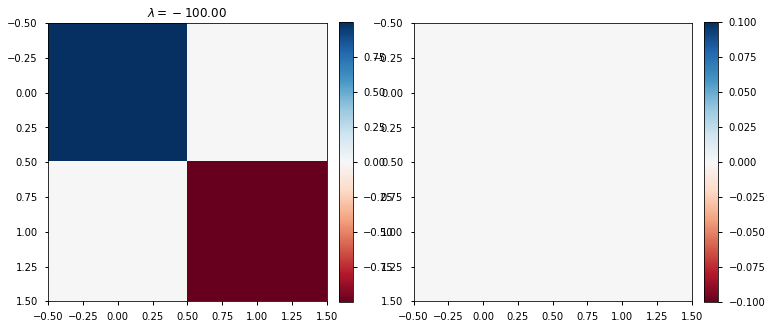

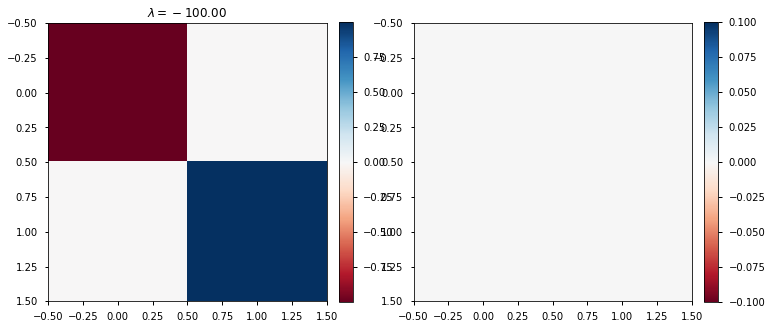

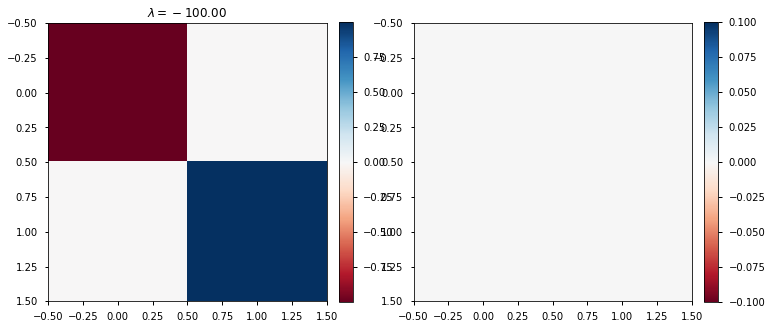

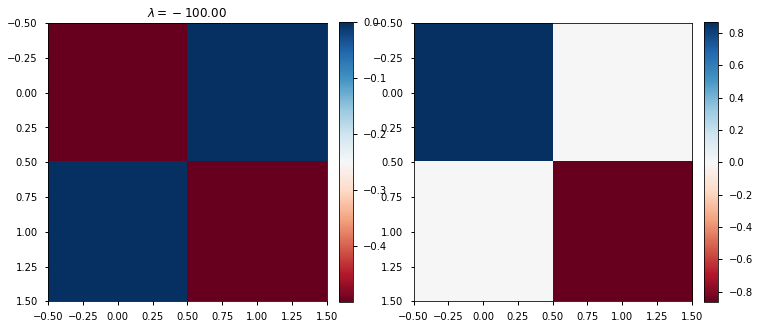

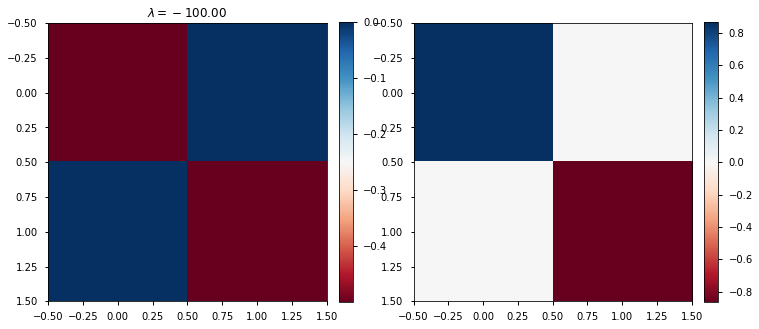

In [235]:
operations = [
    Operation('C_2', 1, 1),
    Operation('C_2', 3, 1),
    Operation('C_2', 5, 1),
    Operation('C_3', 0, 1),
    Operation('C_3', 0, 2),
]

manifolds = {
    'E1' : [2,3],
    'E2' : [4,5,6],
    'E3' : [7,8,9],
    'E4' : [10,11]
}

for op in operations:

    # Make the matrix.
    man = manifolds['E4']
    gsm = GSManifold('eigenstates_bosons_2x2x2_lam-100.00.npy')
    M = gsm.get_matrix(op, substates=man)

    # Get eigenvalues/vectgos.
    ev, es = np.linalg.eig(M)
    B = np.dot(np.dot(np.conj(es.T), M), es)

    with plt.style.context('seaborn-notebook'):
        fig, ax = plt.subplots(1,2, squeeze=False)
        fig.set_size_inches(12,6)


        cbar = ax[0,0].imshow(B.real, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,0],fraction=0.046, pad=0.04)

        cbar = ax[0,1].imshow(B.imag, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,1],fraction=0.046, pad=0.04)

        ax[0,0].set_title('$\\lambda = {:.2f}$'.format(lam))
        print('{:s} on manifold {:s}.'.format(str(op)[:-1], str(man)))
        print(ev)


array([[ 9.99902785e-01+0.j,  1.39672664e-16+0.j],
       [ 1.46714966e-16+0.j, -9.99902785e-01+0.j]])

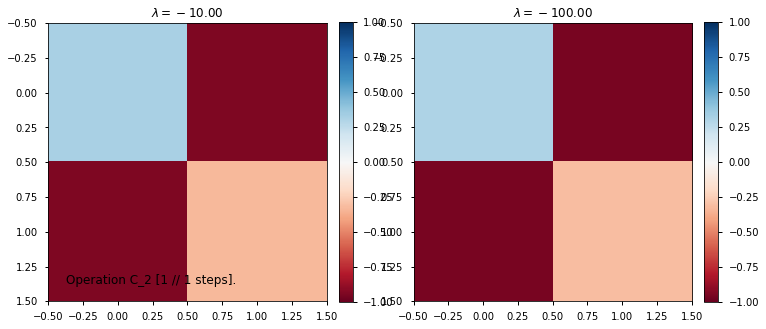

In [154]:


operation = Operation('C_2', 1, 1)
gsm10 = GSManifold('eigenstates_bosons_2x2x2_lam-10.00.npy')
gsm100 = GSManifold('eigenstates_bosons_2x2x2_lam-100.00.npy')

M = {
    -10: gsm10.get_matrix(operation, substates=states),
    -100 : gsm100.get_matrix(operation, substates=states)
}

with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(1,2, squeeze=False)
    fig.set_size_inches(12,6)
    
    for i, lam in enumerate([-10, -100]):
        cbar = ax[0,i].imshow(M[lam].real, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,i],fraction=0.046, pad=0.04)
        cbar.set_clim(-1,1)
        
        ax[0,i].set_title('$\\lambda = {:.2f}$'.format(lam))
        
    fig.text(0.145, 0.22, str(operation), fontsize=12)
    
    
ev, es = np.linalg.eig(M[-100])
ev, es

np.dot(np.dot(np.conj(es.T), M[-100]), es)

(<Figure size 864x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73dc8865e0>,
       dtype=object))

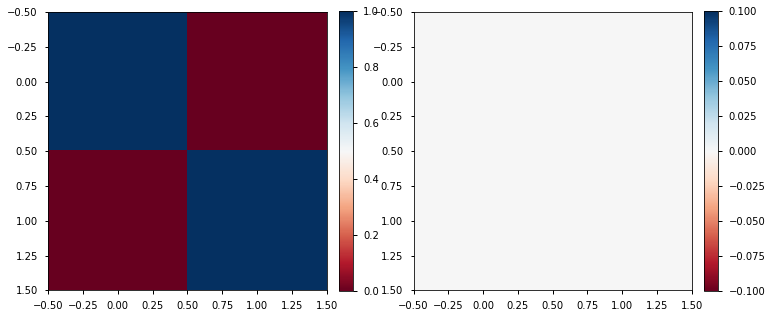

In [155]:
def show_complex_matrix(M, size=(12,6)):
    """ Shows real and complex part of a matrix.
    
        If the largest entry is larger than 1 in magnitude, the matrix is scaled to fit that range.
    """
    with plt.style.context('seaborn-notebook'):
        fig, ax = plt.subplots(1,2, squeeze=False)
        fig.set_size_inches(*size)

        cbar = ax[0,0].imshow(M.real, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,0],fraction=0.046, pad=0.04)

        cbar = ax[0,1].imshow(M.imag, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,1],fraction=0.046, pad=0.04)


    return fig, ax

B = np.dot(np.conj(es.T), es)
show_complex_matrix(B)

array([-0.99992778+0.j,  0.99992778+0.j,  0.99992778+0.j])

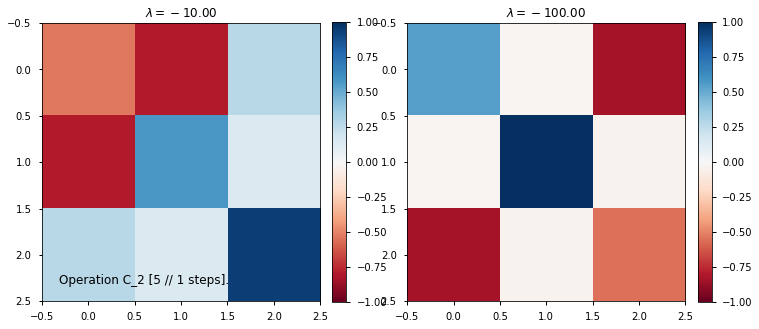

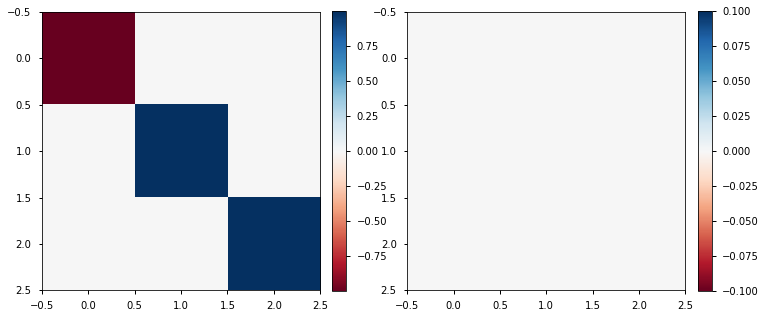

In [172]:
# states = [7,8,9]
states = [4,5,6]
operation = Operation('C_2', 5, 1)
gsm10 = GSManifold('eigenstates_bosons_2x2x2_lam-10.00.npy')
gsm100 = GSManifold('eigenstates_bosons_2x2x2_lam-100.00.npy')

M = {
    -10: gsm10.get_matrix(operation, substates=states),
    -100 : gsm100.get_matrix(operation, substates=states)
}

with plt.style.context('seaborn-notebook'):
    fig, ax = plt.subplots(1,2, squeeze=False)
    fig.set_size_inches(12,6)
    
    for i, lam in enumerate([-10, -100]):
        cbar = ax[0,i].imshow(M[lam].real, cmap=cm.RdBu)
        fig.colorbar(cbar, ax=ax[0,i],fraction=0.046, pad=0.04)
        cbar.set_clim(-1,1)
        
        ax[0,i].set_title('$\\lambda = {:.2f}$'.format(lam))
        
    fig.text(0.145, 0.22, str(operation), fontsize=12)
    
    
ev, es = np.linalg.eig(M[-100])
ev, es


D = np.dot(np.dot(np.conj(es.T), M[-100]), es)
show_complex_matrix(D);
ev

In [139]:
np.sqrt(3)/2

0.8660254037844386

### Find the eigenvalues for all operations.

In [ ]:
gsm = GSManifold('eigenstates.npy')



In [54]:
def apply_operators(op, es):
    """ Takes in a list operators to apply to a list of states. which is nothing but a list of indicies 
        to which the i-th entry maps. This is generated by `make_operator` 
        defined above.
    
        Moeover, takes in a list of states and then produces a table 
        with the corresponding eigenvalues. If not an eigenstate, 
        np.nan is returned.
    """
    parity_map = np.zeros(shape=(len(shifts),len(es)), dtype=int) * np.nan
    for i, op in enumerate(shifts):
        for j in range(len(es)):
            trans = es[:,j][maps[op]]
            if np.allclose(trans, es[:,j], atol=1e-2):
                parity_map[i,j] = 1
            elif np.allclose(trans, -es[:,j], atol=1e-2):
                parity_map[i,j] = -1
    return parity_map



# First: make the operators (same as above).     
operators = {
    'x' : [0], 
    'y' : [1], 
    'z' : [2], 
    'xy' : [0,1], 
    'xz' : [0,2], 
    'yz' : [1,2], 
    'xyz' : [0,1,2],
    'parity' : [],
}
maps = {}
for op, args in operators.items():
    maps[op] = make_operator(op, args, lattices, quiet=True)

# Actually apply them to the desired states.
states = np.load('eigenstates.npy')
ev_table = apply_operators(maps, states)
ev_table.T

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.,  1., -1., -1.],
       [-1., -1., -1.,  1.,  1.,  1., -1., -1.],
       [nan, nan, nan,  1.,  1.,  1.,  1.,  1.],
       [nan, nan, nan,  1.,  1.,  1.,  1.,  1.],
       [nan, nan, nan,  1.,  1.,  1.,  1.,  1.],
       [nan, nan, nan,  1.,  1.,  1., -1., -1.],
       [nan, nan, nan,  1.,  1.,  1., -1., -1.],
       [nan, nan, nan,  1.,  1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.,  1., -1., -1.]])

## Rotations.

In [84]:
# Define the subspace.
def get_matrix(substates, operator):
    es = np.load('eigenstates.npy')
    subspace = es[:,substates]
    M = np.empty(shape=(len(substates),len(substates)))
    for i in range(len(substates)):
        for j in range(len(substates)):
            final = subspace[:,i][maps[operator]]        
            M[i,j] = np.dot(subspace[:,j], final)
    return M
            
from scipy.linalg import eig

for op in shifts:
for op in shifts:
    M = get_matrix([6,7,8], op)
#     M = get_matrix([3,4,5], op)
    evals, estates = eig(M)
    print(op, evals)
    print(estates)

x [-0.99992779+0.j  0.99992779+0.j  0.99992779+0.j]
[[-0.43104245 -0.8824179   0.18852445]
 [ 0.90216584 -0.42545735  0.07129458]
 [-0.0172975  -0.20081007 -0.97947722]]
y [-0.99992779+0.j  0.99992779+0.j  0.99992779+0.j]
[[-0.7950066  -0.55267162  0.25004008]
 [-0.38877111  0.14781252 -0.90940084]
 [-0.46564098  0.82018628  0.33237037]]
z [-0.99992779+0.j  0.99992779+0.j  0.99992779+0.j]
[[-0.42681016  0.26142045 -0.86573168]
 [-0.1869594  -0.96213315 -0.19836052]
 [ 0.88480465 -0.0771955  -0.4595234 ]]
xy [ 0.99992779+0.j -0.99992779+0.j -0.99992779+0.j]
[[-0.42681016  0.87584931 -0.22521957]
 [-0.1869594  -0.32911272 -0.92559532]
 [ 0.88480465  0.35294872 -0.30421941]]
xz [ 0.99992779+0.j -0.99992779+0.j -0.99992779+0.j]
[[-0.7950066  -0.47029444 -0.38312738]
 [-0.38877111  0.87985929 -0.27332408]
 [-0.46564098  0.06834302  0.88233064]]
yz [ 0.99992779+0.j -0.99992779+0.j -0.99992779+0.j]
[[-0.43104245  0.80832649  0.40101217]
 [ 0.90216584  0.37754599  0.20870037]
 [-0.0172975  -0.

## Check rotation closure.

In [77]:
operations = [
#     Operation('P', [0], steps=1),
    Operation('C_3^{0}', 0, steps=1),
    Operation('C_3^{0}', 0, steps=2),
]

lb = LatticeBasis(L=[2,2,2])
lb.make_operator_batch(operations, quiet=True, latex_output=False)

array([[ 7,  8,  2,  1, 10,  9,  4,  3, 12, 11,  5,  6],
       [ 4,  3,  8,  7, 11, 12,  1,  2,  6,  5, 10,  9]])

In [80]:
class GSManifold(object):
    """ Holds the states for the GS manifold so that we can investigate them.
    """
    def __init__(self):
        # These are the maximally flippable plaquettes.
        self.states = np.array([ 3816540, 3872106,  5421780, 5678001, 
                                   7542990,  7743645,  9033570,  9234225, 
                                   11099214, 11355435, 12905109, 12960675 ])
        
        # These are the 12 lowest eigenstates.
        self.eigenstates = np.load('eigenstates.npy')

    def make_operator(self, op, ax, steps=1, quiet=False):
        """
        """ 
        if not quiet:
            print(op, ax)
        mlist = np.empty(shape=(len(self.states)), dtype=int)
        for init, state in enumerate(self.states):
            latt = LatticeObject(state, [2,2,2], quiet=True)
            if op == 'c2':
                latt.apply_c2(ax, steps=steps)
            if op == 'c3':
                latt.apply_c3(ax, steps=steps)
            if op == 'c4':
                latt.apply_c4(ax, steps=steps)
                
            # Find which state we produced.
            try:
                final = np.where(self.states == latt.to_int())[0][0]
            except IndexError:
                final = 1000
                
            # Map.
            mlist[init] = final
            
            # Print the result.
            if not quiet:
                print('{:2s} |{:2d}> = |{:2d}>'.format(op, init+1, final+1))
        self.operator = mlist
            
    def apply_operator(self, state):
        old_state = self.eigenstates[:,state-1]
#         print(old_state)
#         print('---')
        new_state = old_state[self.operator]
#         print(new_state)
        return old_state, new_state
    
    
    def get_matrix(self, substates):
        # Shift to index.
        substates = np.array(substates)-1
        subspace = self.eigenstates[:,substates]
        M = np.empty(shape=(len(substates),len(substates)))
        for i in range(len(substates)):
            for j in range(len(substates)):
                final = subspace[:,i][self.operator]        
                M[i,j] = np.dot(subspace[:,j], final)
        return M

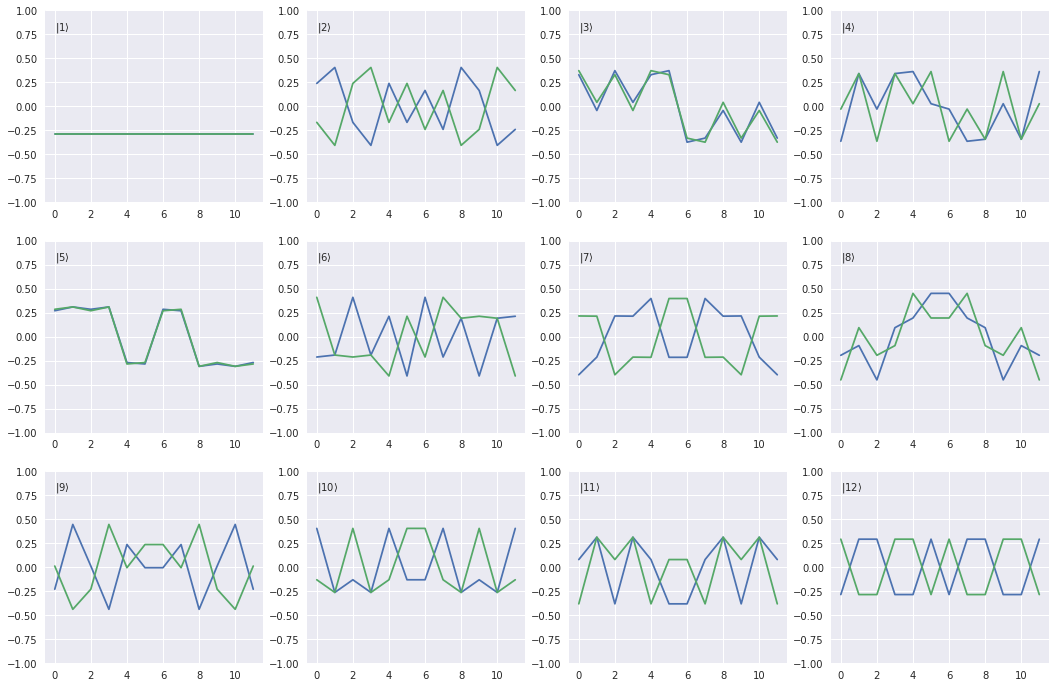

In [85]:
gsm = GSManifold()
gsm.make_operator('c2', ax=5, steps=1, quiet=True)

with plt.style.context('seaborn'):
    fig, axes = plt.subplots(3,4)
    fig.set_size_inches(18,12)
    axes = axes.flatten()
    
    for i, ax in enumerate(axes):   
        os, ns = gsm.apply_operator(i+1)
        ax.plot(os)
        ax.plot(ns)

        ax.text(0, 0.8, '$|{:d}\\rangle$'.format(i+1))
        ax.set_ylim(-1, 1)

In [52]:
from scipy.linalg import eig

M = gsm.get_matrix([4, 5, 6])
evals, estates = eig(M)

for e in evals:
    print(e)
print(estates)

(-0.49996389157487675+0.8659628621567339j)
(-0.49996389157487675-0.8659628621567339j)
(0.9999277831065742+0j)


In [56]:
from scipy.linalg import eig

M = gsm.get_matrix([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
evals, estates = eig(M)

for i, e in enumerate(evals):
    print(e)
    es = np.round(estates[:,i], 5)
    print('---')
    for v in es:
        print(v)
    print('========')

(-0.4999513927230044+0.8659412135110658j)
---
0j
(0.70711+0j)
-0.70711j
0j
-0j
-0j
(-0+0j)
0j
(-0+0j)
0j
-0j
(-0-0j)
(-0.4999513927230044-0.8659412135110658j)
---
-0j
(0.70711-0j)
0.70711j
-0j
0j
0j
(-0-0j)
-0j
(-0-0j)
-0j
0j
(-0+0j)
(-0.4999763892121607+0.8659845087002944j)
---
(-0+0j)
(-0-0j)
(-0+0j)
0j
(-0+0j)
(-0-0j)
(-0+0j)
0j
(-0-0j)
(0.70711+0j)
-0.70711j
0j
(-0.4999763892121607-0.8659845087002944j)
---
(-0-0j)
(-0+0j)
(-0-0j)
-0j
(-0-0j)
(-0+0j)
(-0-0j)
-0j
(-0+0j)
(0.70711-0j)
0.70711j
-0j
(-0.49996389339627123+0.8659628653122916j)
---
-0j
0j
0j
0j
0j
(-0+0j)
(0.14425+0.61051j)
(0.64672+0j)
(0.24686-0.35675j)
-0j
0j
(-0+0j)
(-0.49996389339627123-0.8659628653122916j)
---
0j
-0j
-0j
-0j
-0j
(-0-0j)
(0.14425-0.61051j)
(0.64672-0j)
(0.24686+0.35675j)
0j
-0j
(-0-0j)
(-0.4999638915758601+0.8659628621592471j)
---
-0j
-0j
(-0+0j)
(0.00026+0.70598j)
(-0.00456+0.03994j)
(0.70709+0j)
(-0-0j)
(-0-0j)
-0j
-0j
(-0+0j)
(-0+0j)
(-0.4999638915758601-0.8659628621592471j)
---
0j
0j
(-0-0j)
(0.00

In [31]:
from scipy.linalg import eig

M = gsm.get_matrix([4, 5, 6])
evals, estates = eig(M)

print(evals)
# print(estates)

[-0.49996389+0.86596286j -0.49996389-0.86596286j  0.99992778+0.j        ]


In [32]:
from scipy.linalg import eig

M = gsm.get_matrix([7, 8, 9])
evals, estates = eig(M)

print(evals)
# print(estates)

[-0.49996389+0.86596287j -0.49996389-0.86596287j  0.99992779+0.j        ]


In [33]:
from scipy.linalg import eig

M = gsm.get_matrix([10, 11])
evals, estates = eig(M)

print(evals)
# print(estates)

[-0.49997639+0.86598451j -0.49997639-0.86598451j]


## Full symmetry investigation.

In [47]:
def apply_rotations(rotations, states, quiet=False):
    """ Takes a list of operators in thoe form:
            
            [
                [operator, axis, steps],
                [operator, axis, steps],
                ....
            ]
            
        which will be applied to the states. Returns a list of states
        that are generated from these.
    """

    r_list = np.zeros(shape=(len(rotations),len(states)), dtype=int) - 10
    for i, (op, ax, s) in enumerate(rotations):
        if not quiet:
            print('---')
            print(op, ax)
        for init, state in enumerate(states):
            latt = LatticeObject(state, [2,2,2], quiet=True)

            if op == 'c2':
                latt.apply_c2(ax, steps=s)
            if op == 'c3':
                latt.apply_c3(ax, steps=s)
            if op == 'c4':
                latt.apply_c4(ax, steps=s)

            try:
                final = np.where(states == latt.to_int())[0][0]
                if not quiet:
                    print('{:2s} |{:2d}> = |{:2d}>'.format(op, init+1, final+1))
            except IndexError:
                final = -10
                if not quiet:
                    print('{:2s} |{:2d}> = --- '.format(op, init+1, final+1))
            r_list[i,init] = final+1
    return r_list
        
        
# These are the 12 GS states with 16 flippable plaquettes.
states = np.array([    
    3816540,
    3872106,
    5421780,
    5678001,
    7542990,
    7743645,
    9033570,
    9234225,
    11099214,
    11355435,
    12905109,
    12960675
])



# These are the rotations to be applied.
rotations = [
    ['c2', 0, 1],
    ['c2', 1, 1],
    ['c2', 2, 1],
    ['c2', 3, 1],
    ['c2', 4, 1],
    ['c2', 5, 1],
    
#     ['c3', 'x', 1],
#     ['c3', 'y', 1],
#     ['c3', 'z', 1],
    
#     ['c4', 0, 1],
#     ['c4', 1, 1],
#     ['c4', 2, 1],
#     ['c4', 3, 1],
]
rot_states = apply_rotations(rotations, states, quiet=True)
rot_states

array([[ 1, -9, -9, -9,  5, -9, -9,  8, -9, -9, -9, 12],
       [ 8,  7,  4,  3, 12, 11,  2,  1, 10,  9,  6,  5],
       [-9, -9,  3, -9, -9,  6,  7, -9, -9, 10, -9, -9],
       [ 2,  1,  7,  8,  9, 10,  3,  4,  5,  6, 12, 11],
       [-9,  2, -9,  4, -9, -9, -9, -9,  9, -9, 11, -9],
       [ 3,  4,  1,  2,  6,  5,  8,  7, 11, 12,  9, 10]])

In [48]:
def _to_table(entries, ops):
    """ Takes a 2D array and produces the bulk of a table.
    """
    conv = lambda x: '---' if x < 0 else '$\ket{'+str(x)+'}$' 
    rows, cols = np.shape(entries.T)
    
    # Header.
    print('\\begin{tabular}{c|' + 'c'*cols + '}')
    print('\\hline')
    op_line = '  $\\ket{n}$ &'
    for j in range(cols):
        op_line += '$' + ops[j] + '$  & '
    print(op_line[:-2] + ' \\\\')
    print('\\hline')
    
    # Bulk.
    for i in range(rows):
        print('  $\\ket{'+str(i+1)+'}$ & ' + ' & '.join(map(conv, entries[:,i])) + ' \\\\')
        
    # Fin.
    print('\\hline')
        
_to_table(rot_states, ops=['C_2^{:d}'.format(k) for k in range(len(rotations))])

\begin{tabular}{c|cccccc}
\hline
  $\ket{n}$ &$C_2^0$  & $C_2^1$  & $C_2^2$  & $C_2^3$  & $C_2^4$  & $C_2^5$   \\
\hline
  $\ket{1}$ & $\ket{1}$ & $\ket{8}$ & --- & $\ket{2}$ & --- & $\ket{3}$ \\
  $\ket{2}$ & --- & $\ket{7}$ & --- & $\ket{1}$ & $\ket{2}$ & $\ket{4}$ \\
  $\ket{3}$ & --- & $\ket{4}$ & $\ket{3}$ & $\ket{7}$ & --- & $\ket{1}$ \\
  $\ket{4}$ & --- & $\ket{3}$ & --- & $\ket{8}$ & $\ket{4}$ & $\ket{2}$ \\
  $\ket{5}$ & $\ket{5}$ & $\ket{12}$ & --- & $\ket{9}$ & --- & $\ket{6}$ \\
  $\ket{6}$ & --- & $\ket{11}$ & $\ket{6}$ & $\ket{10}$ & --- & $\ket{5}$ \\
  $\ket{7}$ & --- & $\ket{2}$ & $\ket{7}$ & $\ket{3}$ & --- & $\ket{8}$ \\
  $\ket{8}$ & $\ket{8}$ & $\ket{1}$ & --- & $\ket{4}$ & --- & $\ket{7}$ \\
  $\ket{9}$ & --- & $\ket{10}$ & --- & $\ket{5}$ & $\ket{9}$ & $\ket{11}$ \\
  $\ket{10}$ & --- & $\ket{9}$ & $\ket{10}$ & $\ket{6}$ & --- & $\ket{12}$ \\
  $\ket{11}$ & --- & $\ket{6}$ & --- & $\ket{12}$ & $\ket{11}$ & $\ket{9}$ \\
  $\ket{12}$ & $\ket{12}$ & $\ket{5}$ & ---

##### C3 rotations.

In [95]:
# These are the rotations to be applied.
rotations = [
    ['c4', 'x', 1],
    ['c4', 'x', 2],
    ['c4', 'x', 3],
    
    ['c4', 'y', 1],
    ['c4', 'y', 2],
    ['c4', 'y', 3],
    
    ['c4', 'z', 1],
    ['c4', 'z', 2],
    ['c4', 'z', 3],
    
#     ['c4', 0, 1],
#     ['c4', 1, 1],
#     ['c4', 2, 1],
#     ['c4', 3, 1],
]
rot_states = apply_rotations(rotations, states, quiet=True)

ops = [
    'C_4^x',
    '(C_4^x)^2',
    '(C_4^x)^3',
    
    'C_4^y',
    '(C_4^y)^2',
    '(C_4^y)^3',
    
    'C_4^z',
    '(C_4^z)^2',
    '(C_4^z)^3',
]
_to_table(rot_states, ops=ops)

\begin{tabular}{c|ccccccccc}
\hline
  $\ket{n}$ &$C_4^x$  & $(C_4^x)^2$  & $(C_4^x)^3$  & $C_4^y$  & $(C_4^y)^2$  & $(C_4^y)^3$  & $C_4^z$  & $(C_4^z)^2$  & $(C_4^z)^3$   \\
\hline
  $\ket{1}$ & --- & --- & $\ket{4}$ & --- & $\ket{8}$ & --- & $\ket{7}$ & --- & --- \\
  $\ket{2}$ & $\ket{8}$ & --- & --- & --- & --- & $\ket{3}$ & --- & $\ket{4}$ & --- \\
  $\ket{3}$ & --- & $\ket{7}$ & --- & $\ket{2}$ & --- & --- & --- & --- & $\ket{8}$ \\
  $\ket{4}$ & $\ket{1}$ & --- & --- & --- & --- & $\ket{7}$ & --- & $\ket{2}$ & --- \\
  $\ket{5}$ & --- & --- & $\ket{11}$ & --- & $\ket{12}$ & --- & $\ket{10}$ & --- & --- \\
  $\ket{6}$ & --- & $\ket{10}$ & --- & $\ket{9}$ & --- & --- & --- & --- & $\ket{12}$ \\
  $\ket{7}$ & --- & $\ket{3}$ & --- & $\ket{4}$ & --- & --- & --- & --- & $\ket{1}$ \\
  $\ket{8}$ & --- & --- & $\ket{2}$ & --- & $\ket{1}$ & --- & $\ket{3}$ & --- & --- \\
  $\ket{9}$ & $\ket{12}$ & --- & --- & --- & --- & $\ket{6}$ & --- & $\ket{11}$ & --- \\
  $\ket{10}$ & --- & $\ket{6}

In [94]:
# These are the rotations to be applied.
rotations = [
    ['c3', 0, 1],
    ['c3', 0, 2],
    
    ['c3', 1, 1],
    ['c3', 1, 2],
    
    ['c3', 2, 1],
    ['c3', 2, 2],
    
    ['c3', 3, 1],
    ['c3', 3, 2],
]
rot_states = apply_rotations(rotations, states, quiet=True)

ops = [
    'C_3^0',
    '(C_3^0)^2',
    
    'C_3^1',
    '(C_3^1)^2',
    
    'C_3^2',
    '(C_3^2)^2',
    
    'C_3^2',
    '(C_3^2)^2',
]
_to_table(rot_states, ops=ops)

\begin{tabular}{c|cccccccc}
\hline
  $\ket{n}$ &$C_3^0$  & $(C_3^0)^2$  & $C_3^1$  & $(C_3^1)^2$  & $C_3^2$  & $(C_3^2)^2$  & $C_3^2$  & $(C_3^2)^2$   \\
\hline
  $\ket{1}$ & $\ket{7}$ & $\ket{4}$ & --- & $\ket{2}$ & $\ket{3}$ & --- & --- & --- \\
  $\ket{2}$ & $\ket{8}$ & $\ket{3}$ & $\ket{1}$ & --- & --- & --- & $\ket{7}$ & --- \\
  $\ket{3}$ & $\ket{2}$ & $\ket{8}$ & --- & --- & --- & $\ket{1}$ & --- & $\ket{4}$ \\
  $\ket{4}$ & $\ket{1}$ & $\ket{7}$ & $\ket{8}$ & --- & --- & --- & $\ket{3}$ & --- \\
  $\ket{5}$ & $\ket{10}$ & $\ket{11}$ & --- & $\ket{9}$ & $\ket{6}$ & --- & --- & --- \\
  $\ket{6}$ & $\ket{9}$ & $\ket{12}$ & --- & --- & --- & $\ket{5}$ & --- & $\ket{11}$ \\
  $\ket{7}$ & $\ket{4}$ & $\ket{1}$ & --- & --- & --- & $\ket{8}$ & --- & $\ket{2}$ \\
  $\ket{8}$ & $\ket{3}$ & $\ket{2}$ & --- & $\ket{4}$ & $\ket{7}$ & --- & --- & --- \\
  $\ket{9}$ & $\ket{12}$ & $\ket{6}$ & $\ket{5}$ & --- & --- & --- & $\ket{10}$ & --- \\
  $\ket{10}$ & $\ket{11}$ & $\ket{5}$ & --- & --- 